In [17]:
from __future__ import print_function
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from numpy import linalg as la

plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = [10, 6]

import numpy as np


# Bias and variance in line fitting 

We will fit a line to measured points on the line, corrupted by noise. The goal is to understand the impact of noise on the quality of fits. 

We will consider different distribution of samples on the line and study its influence on the solutions. The center of the sampling locations are indicated by center_of_interval, while the width of the interval is denote by width_of_interval. We will try varying the center and width to see their impact on the variance of the estimates. This can be done by uncommmenting the lines that vary the center_of_interval and width_of_interval below


 

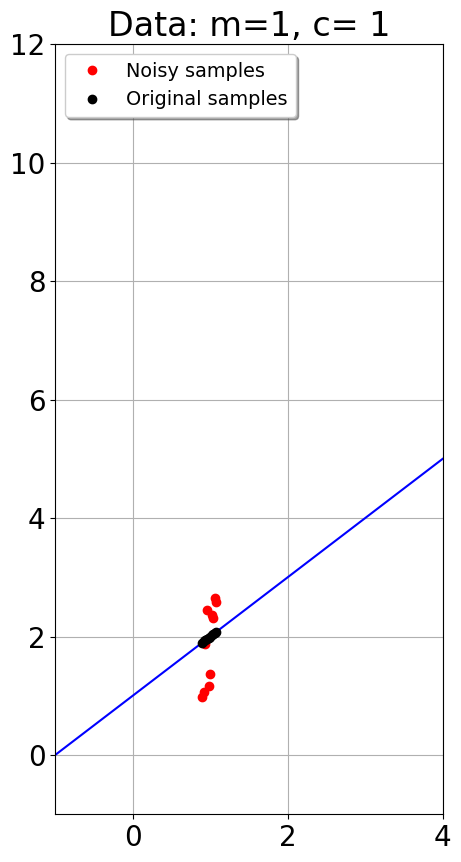

In [18]:

# Vary the center and width 
#center_of_interval = 0
#width_of_interval = 1

center_of_interval = 1
width_of_interval = 0.2
#center_of_interval = 1
#width_of_interval = 10

npoints = 10
# Noise variance
sigma = 0.5

morig = 1
corig = 1
    
# Xlocations for plotting
xplot = np.arange(-1,5)

# Xlocations for sampling
x = np.arange(0,npoints)/npoints
x = width_of_interval*(x-0.5)+ center_of_interval

yorig = morig*x + corig
y = yorig + sigma*np.random.normal(size=np.shape(yorig))
yplot = morig*xplot + corig

fig = plt.figure(figsize = (5, 10))
ax = fig.gca()
cs = ax.plot(x, y,'ro',label='Noisy samples')
cs = ax.plot(xplot, yplot,'b')
cs = plt.ylim(-1,12)
cs = plt.xlim(-1,4)
cs = ax.plot(x,yorig,'ko',label='Original samples')
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-small')
cs=plt.title('Data: m='+str(morig)+', c= '+str(corig))
cs = plt.grid()
#string = './../figures/lineplot_'+str(center_of_interval)+"_"+str(int(10*width_of_interval))+".pdf"
#plt.savefig(string)

## Bias and Variance: Scatter plot of estimates

We will use ridge regression from scikit-learn, which solves the optimization problem 
$$\mathbf p^* = \arg \min_{\mathbf p}\|\mathbf X \mathbf p - \mathbf y\|^2 + \alpha \|\mathbf p\|^2 $$

The function below shows the scatter plots for a specific set of parameters, assuming Ndata different training datapoints. Each data point is 

In [19]:
def giveFits(alp,X,yorig,ridge,Ndata):
    ridge.set_params(alpha=alp)

    coeffs = np.empty([2,Ndata])
    for i in range(0,Ndata):
        y = yorig + sigma*np.random.normal(size=np.shape(yorig))
        ridge.fit(X, y)
        coeffs[:,i] = np.array(ridge.coef_)
    return coeffs

def showScatterPlots(alp,X,y,ridge,Ndata):
    # Evaluating and plotting the coefficients and best fit lines for different realizations
    fig,axs = plt.subplots(1,2,figsize = (10, 5))
    coeffs = giveFits(alp,X,yorig,ridge,Ndata)
    print(coeffs.shape)
    coeff_mean = np.mean(coeffs,axis=1)

    # Plotting the mean and original points

    h = axs[0].plot(corig,morig,'ro',markersize=4,label='Original')
    h = axs[0].plot(coeffs[0,:],coeffs[1,:],'k.')
    h = axs[0].plot(coeff_mean[0],coeff_mean[1],'m*',markersize=4,label='Mean')

    Xplot = np.column_stack((xplot,np.ones(np.shape(xplot))))
    yplot = np.matmul(Xplot,coeffs)
    h = axs[1].plot(xplot,yplot)

    h = axs[1].grid()
    
    h = axs[0].set_ylim(morig-2,morig+2)
    h = axs[0].set_xlim(corig-2,corig+2)
    h = axs[0].set_xlabel('m')
    h = axs[0].set_ylabel('c')
    h = axs[0].set_title('Coeffs (Original : m='+str(morig)+', c= '+str(corig)+')')
    h = axs[0].grid()

    legend = axs[0].legend(loc='best', shadow=True, fontsize='small')



(2, 100)


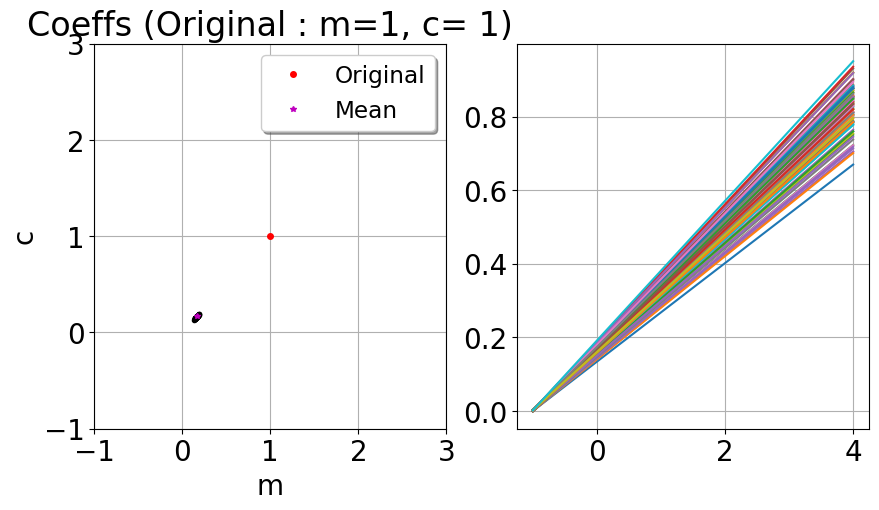

In [20]:
# Regularization parameters
# System matrix
X = x
X = np.column_stack((X,np.ones(np.shape(x))))
ridge = Ridge(max_iter = 2000, fit_intercept=False)

Ndata = 100
lam = 100
showScatterPlots(lam, X,y,ridge=ridge,Ndata=Ndata)


## To do: Plot the MSE vs $\lambda$ curves

For each $\lambda$, choose Ndata random datasets to fit the data. From the Ndata fits, we will estimate the mean and the variance measures, as well as MSE measures. You will fill in the missing code to complete the plots.

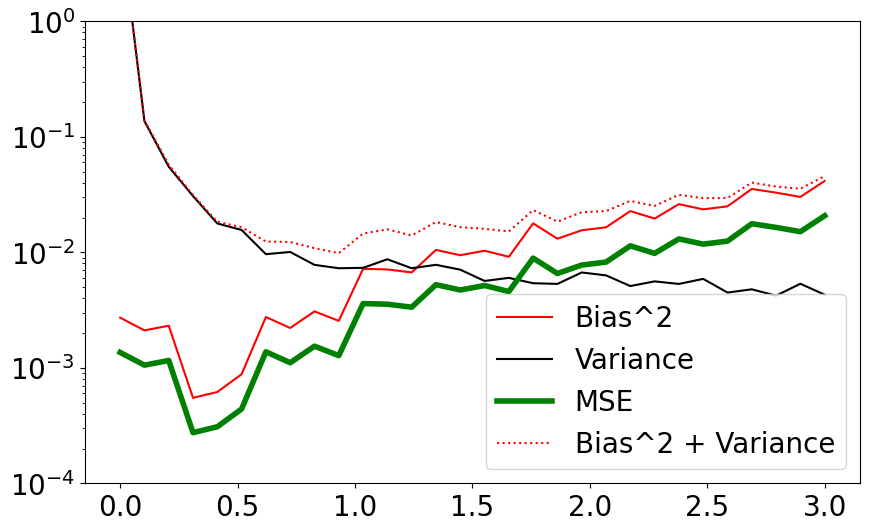

In [21]:
Nalpha = 30
Ndata = 100
AlphaArray = np.linspace(0,3,Nalpha)
X = x
X = np.column_stack((X,np.ones(np.shape(x))))
coefforg = np.array([morig,corig])
biassq = np.empty([Nalpha,1])
var = np.empty([Nalpha,1])
mse = np.empty([Nalpha,1])


for i in range(Nalpha):
    alp = AlphaArray[i]
    coeffs = giveFits(alp,X,yorig,ridge,Ndata)
    # TODO: Compute the bias, variance, and mse
    # Change the code below to obtain the bias, variance, and mse plot
    # The plots will show that MSE=Bias^2 + Variance
    
    # Compute the mean of the coefficients for the specific alpha
    coeff_mean = np.mean(coeffs, axis=1)
    var[i]  = np.mean(np.var(coeffs, axis=1))
    biassq[i] = np.sum((coeff_mean-coefforg)**2)
    bias= np.mean(coeffs, axis=1)-coefforg
    mse[i] = np.mean(bias**2)

    #------------------------------------------------------------

h = plt.plot(AlphaArray,(biassq),'r',label='Bias^2')
h = plt.plot(AlphaArray,(var),'k',label='Variance')
h = plt.plot(AlphaArray,(mse),'g',label='MSE',linewidth=4)
h = plt.plot(AlphaArray,(biassq + var),'r:',label='Bias^2 + Variance')

h = plt.legend()
h = plt. yscale('log')
h = plt.ylim([0.0001,1])
